In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import train_test_split

In [33]:
iris_dataset = load_iris()

In [34]:
X = iris_dataset.data
y = iris_dataset.target

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, random_state=58)

In [35]:
X_train.shape

(105, 4)

In [36]:
X_test.shape

(45, 4)

In [37]:
# 객체 생성
clf = DecisionTreeClassifier(max_depth = None)

In [38]:
# 모델링
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [39]:
clf.score(X_test,y_test)

0.9333333333333333

In [40]:
a=clf.predict(X_test)

In [41]:
(a == y_test).mean()

0.9333333333333333

In [42]:
print('트레인 세트 정확도: {:.2f}'.format(clf.score(X_train,y_train)))
print('테스트 세트 정확도: {:.2f}'.format(clf.score(X_test,y_test)))

트레인 세트 정확도: 1.00
테스트 세트 정확도: 0.93


In [43]:
import os
import sys

In [44]:
print('\n'.join(sys.path))

C:\Users\User\Desktop\Machine learning\jupyter
C:\ProgramData\Anaconda3\python37.zip
C:\ProgramData\Anaconda3\DLLs
C:\ProgramData\Anaconda3\lib
C:\ProgramData\Anaconda3

C:\Users\User\AppData\Roaming\Python\Python37\site-packages
C:\ProgramData\Anaconda3\lib\site-packages
C:\ProgramData\Anaconda3\lib\site-packages\win32
C:\ProgramData\Anaconda3\lib\site-packages\win32\lib
C:\ProgramData\Anaconda3\lib\site-packages\Pythonwin
C:\ProgramData\Anaconda3\lib\site-packages\IPython\extensions
C:\Users\User\.ipython


In [45]:
os.environ["PATH"] += os.pathsep + 'C:\\ProgramData\\Anaconda3\\Library\\bin\\graphviz'

In [46]:
from sklearn.tree import export_graphviz
import graphviz #설치 필요

In [47]:
export_graphviz(clf, out_file = "./tree_data/tree.dot",
               feature_names= iris_dataset.feature_names,
               class_names=iris_dataset.target_names,
               filled =True)

In [48]:
with open("./tree_data/tree.dot") as f:
    dot_graph = f.read()

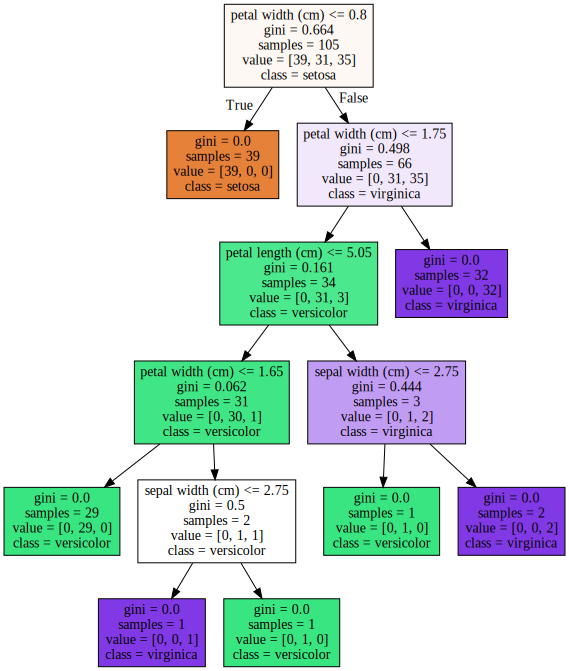

In [49]:
graphviz.Source(dot_graph)

In [50]:
clf1 = DecisionTreeClassifier(max_depth=3)

In [51]:
clf1.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [52]:
print('트레인 세트 정확도: {:.2f}'.format(clf1.score(X_train,y_train)))
print('테스트 세트 정확도: {:.2f}'.format(clf1.score(X_test,y_test)))

트레인 세트 정확도: 0.98
테스트 세트 정확도: 0.96


In [53]:
clf1.feature_importances_

array([0.        , 0.        , 0.58739009, 0.41260991])

In [54]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager as fm

font_path = 'C:\\WINDOWS\\Fonts\\malgun.ttf'
font_name = fm.FontProperties(fname = font_path).get_name()
plt.rcParams['font.family'] = font_name

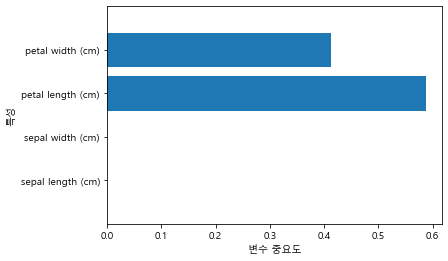

In [55]:
n_features = iris_dataset.data.shape[1]
plt.barh(range(n_features), clf1.feature_importances_, align = 'center')
plt.yticks(np.arange(n_features), iris_dataset.feature_names)
plt.xlabel("변수 중요도")
plt.ylabel("특성")
plt.ylim(-1,n_features)
plt.show()

In [56]:
from sklearn.datasets import load_breast_cancer

In [57]:
cancer_dataset = load_breast_cancer()

X = cancer_dataset.data
y = cancer_dataset.target
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, random_state=58)

In [58]:
clf_tree = DecisionTreeClassifier(max_depth=None)

In [59]:
clf_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

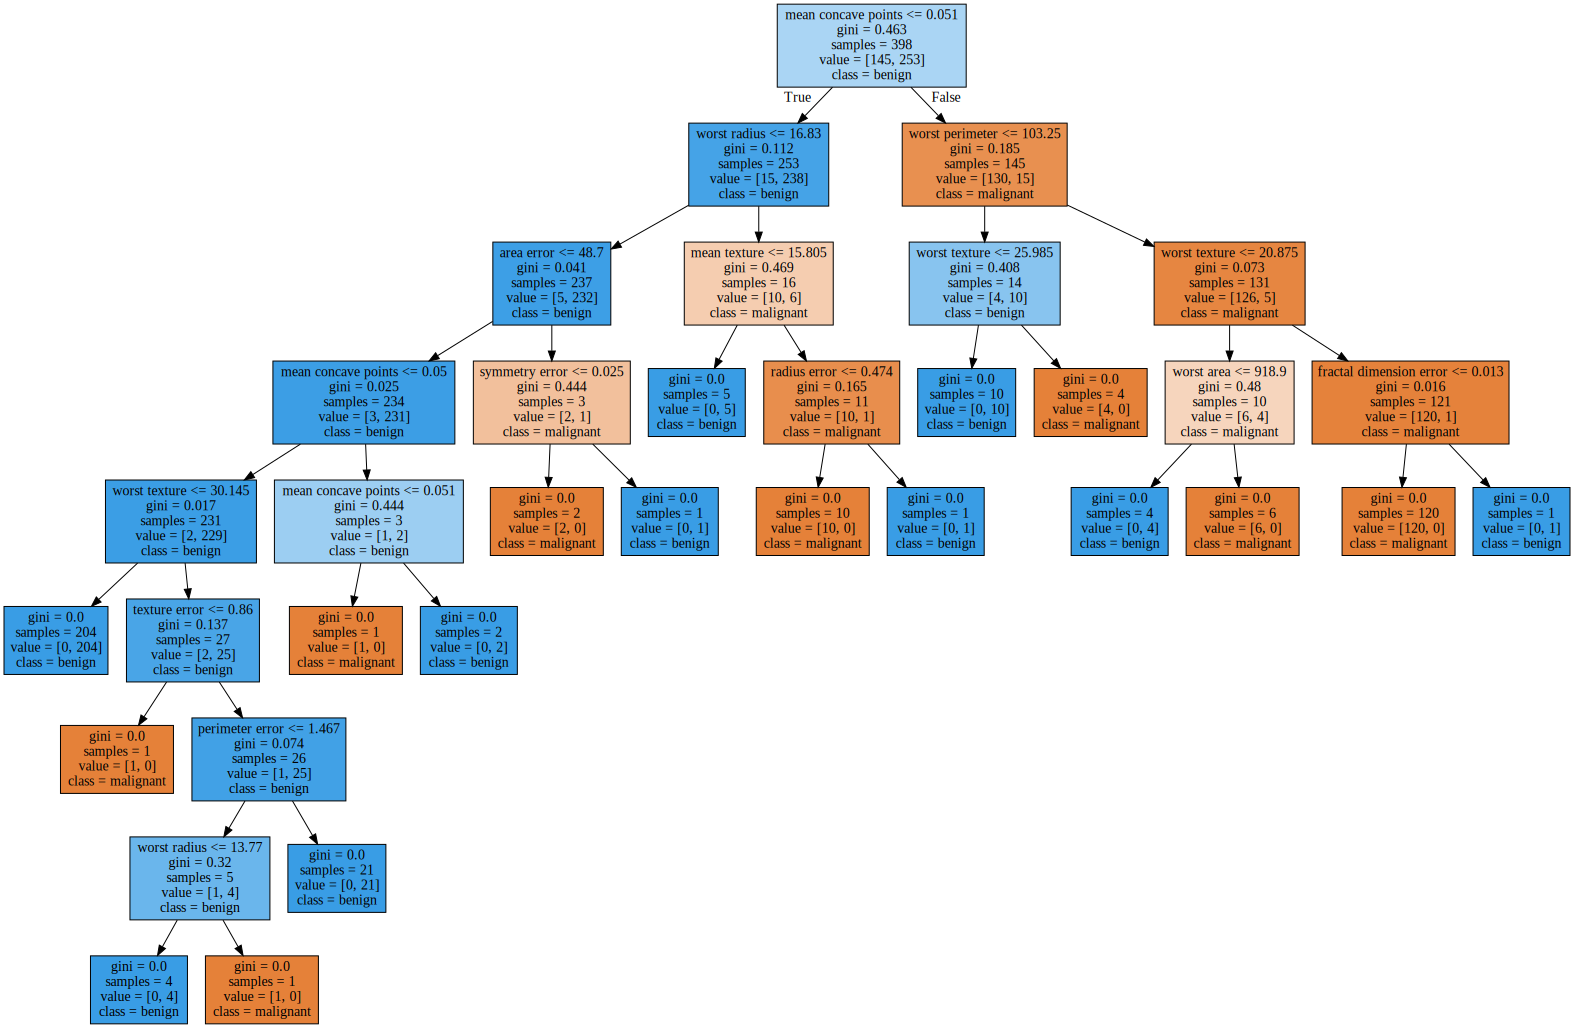

In [60]:
export_graphviz(clf_tree, out_file = "./tree_data/cancer_tree.dot",
               feature_names= cancer_dataset.feature_names,
               class_names= cancer_dataset.target_names,
               filled =True)

with open("./tree_data/cancer_tree.dot") as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

In [71]:
cancer_graph = graphviz.Source(dot_graph)
cancer_graph.format = 'png'
cancer_graph.render(filename='cancer_tree')

'cancer_tree.png'

In [62]:
from sklearn.tree import DecisionTreeClassifier

import matplotlib.font_manager as fm

font_path = 'C:\\WINDOWS\\Fonts\\malgun.ttf'
font_name = fm.FontProperties(fname = font_path).get_name()
plt.rcParams['font.family'] = font_name

In [63]:
depth = range(1,31)
train_acc_tree = []
test_acc_tree = []
for i in depth:
    clf_tree = DecisionTreeClassifier(max_depth=i)
    clf_tree.fit(X_train,y_train)
    train_acc_tree.append(clf_tree.score(X_train,y_train))
    test_acc_tree.append(clf_tree.score(X_test,y_test))

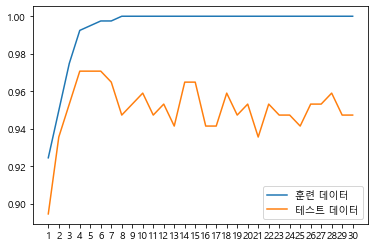

In [64]:
plt.plot(depth, train_acc_tree, label = '훈련 데이터')
plt.plot(depth, test_acc_tree, label = '테스트 데이터')
plt.xticks(depth, depth)
plt.legend()
plt.show()